In [1]:
# This block allows us to import from the benchmark folder,
# as if it was a package installed using pip
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
import itertools
from util import datasets, methods, models
from os import path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from benchmark.sanity_checks import model_randomisation

In [11]:
metric = 'spearman'  # one of spearman, abs_spearman, hog or ssim

device = "cuda"
dataset_name = "CIFAR10"
model_name = "resnet20"
download_dataset = False
batch_size = 16
n_batches = 3
data_root = '..\data'
normalize_attrs = False
aggregation_fn = "avg"

In [12]:
dataset = datasets.Cifar(batch_size=batch_size, data_location=path.join(data_root, "CIFAR10"), download=False,
                         shuffle=False, version="cifar10")
model = models.CifarResnet(version=model_name, params_loc=path.join(data_root, "models/CIFAR10_resnet20.pth"),
                           num_classes=10,output_logits=True)
model.to(device)
model.eval()
pass  # Prevents output from model.eval()

In [13]:
kwargs = {
    "normalize": normalize_attrs,
    "aggregation_fn": aggregation_fn
}

attribution_methods = {
    # "GuidedGradCAM": methods.GuidedGradCAM(model, model.get_last_conv_layer(), **kwargs),
    "Gradient": methods.Gradient(model, **kwargs),
    "InputXGradient": methods.InputXGradient(model, **kwargs),
    "IntegratedGradients": methods.IntegratedGradients(model, **kwargs),
    "GuidedBackprop": methods.GuidedBackprop(model, **kwargs),
    "Deconvolution": methods.Deconvolution(model, **kwargs),
    "Random": methods.Random(**kwargs)
}


In [14]:
result = model_randomisation(dataset.get_dataloader(), model, attribution_methods, n_batches, device=device, metric=metric)
 

C:\Users\axelj\Anaconda3\envs\Benchmarking\lib\site-packages\captum\attr\_utils\gradient.py:33: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index
C:\Users\axelj\Anaconda3\envs\Benchmarking\lib\site-packages\captum\attr\_core\guided_backprop_deconvnet.py:56: UserWarning: Setting backward hooks on ReLU activations.The hooks will be removed after the attribution is finished
  "Setting backward hooks on ReLU activations."


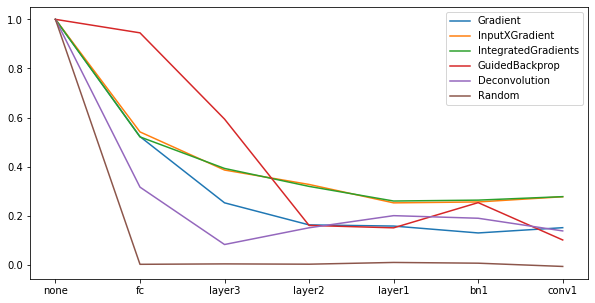

In [15]:
df = pd.DataFrame.from_dict(result)
df.plot(figsize=(10,5))
